<a href="https://colab.research.google.com/github/ai-fast-track/icedata/blob/master/Creating_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing IceVision

In [1]:
!pip install icevision[all] icedata

     |████████████████████████████████| 92kB 5.2MB/s 
     |████████████████████████████████| 3.1MB 14.8MB/s 
     |████████████████████████████████| 11.6MB 53.5MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
     |████████████████████████████████| 71kB 9.2MB/s 
     |████████████████████████████████| 71kB 8.3MB/s 
     |████████████████████████████████| 122kB 62.9MB/s 
     |████████████████████████████████| 49.5MB 63kB/s 
     |████████████████████████████████| 409kB 62.8MB/s 
     |████████████████████████████████| 122kB 78.2MB/s 
     |████████████████████████████████| 194kB 64.6MB/s 
     |████████████████████████████████| 61kB 8.7MB/s 
     |████████████████████████████████| 81kB 10.4MB/s 
     |████████████████████████████████| 952kB 46.7MB/s 
     |████████████████████████████████| 2.8MB 48.6MB/s 
     |████████████████████████████████| 225kB 70.3MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-cp36-none-any.whl size=65165 sha256=b81ff481f3366

In [1]:
from icevision.all import *

# How to create a new dataset using OIDv4 Toolkit

### Cloning OIDv4 Toolkit

In [2]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422
Receiving objects: 100% (422/422), 34.08 MiB | 17.39 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [3]:
%cd OIDv4_ToolKit/
!ls

/content/OIDv4_ToolKit
classes.txt  images  LICENSE  main.py  modules	README.md  requirements.txt


### Installing requirements

In [4]:
!pip install -r requirements.txt

     |████████████████████████████████| 1.3MB 8.6MB/s 
     |████████████████████████████████| 6.7MB 40.5MB/s 
     |████████████████████████████████| 552kB 55.7MB/s 
     |████████████████████████████████| 71kB 8.3MB/s 
  Created wheel for awscli: filename=awscli-1.18.153-py2.py3-none-any.whl size=3354722 sha256=29b79897e649aaf36ff705cf12adf932fc4e179c01a46243b519b915b9554e3d
  Stored in directory: /root/.cache/pip/wheels/2d/42/20/ce50d9438e1ce7655a3c2b928221afb57749bd140c74d70845
Successfully built awscli
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: docutils 0.16
    Uninstalling docutils-0.16:
      Successfully uninstalled docutils-0.16
  Found existing installation: rsa 4.6
    Uninstalling rsa-4.6:
      Successfully uninstalled rsa-4.6


## Downloading dataset using a script

In [ ]:
!python main.py downloader --classes Apple Orange Pineapple Banana Pear --type_csv train --limit 50 --Dataset fruits


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Apple.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] 

In [ ]:
!ls OID/fruit/train/Apple/Label/

### Setting dataset directory

In [12]:
data_dir = Path("OID/fruit/train")

In [15]:
(data_dir/"Apple").ls()

(#147) [Path('OID/fruit/train/Apple/358f229aa8895684.jpg'),Path('OID/fruit/train/Apple/2461005b8c88c6c0.jpg'),Path('OID/fruit/train/Apple/03752d7653d0c6f2.jpg'),Path('OID/fruit/train/Apple/5da9b9a84b8c5092.jpg'),Path('OID/fruit/train/Apple/74c8b4869dd1b12b.jpg'),Path('OID/fruit/train/Apple/62f4a4ffb8881555.jpg'),Path('OID/fruit/train/Apple/530c6787d83717cb.jpg'),Path('OID/fruit/train/Apple/61d30e5b004da6e4.jpg'),Path('OID/fruit/train/Apple/98b15b51defdea3e.jpg'),Path('OID/fruit/train/Apple/751c9e67eec48a70.jpg')...]

## Parser

In [18]:
_CLASSES = ["Apple", "Orange", "Pineapple", "Banana", "Pear"]
class_map = ClassMap(_CLASSES)

In [19]:
class_map.get_name("Pear")

5

In [20]:
class OIDParser(parsers.Parser, parsers.ImageidMixin, parsers.FilepathMixin, parsers.LabelsMixin, parsers.BBoxesMixin):
    def __init__(self, data_dir, class_map):
        self.data_dir = data_dir
        self.images_filepaths = get_image_files(data_dir)
        self.class_map = class_map

    def __iter__(self) -> Any:
        yield from self.images_filepaths

    def prepare(self, o):
        label_filepath = o.parent / f"Label/{o.with_suffix('.txt').name}"
        self.raw_labels = label_filepath.read().strip('\n').split('\n')

    def imageid(self, o) -> Hashable:
        return o.stem

    def filepath(self, o) -> Union[str, Path]:
        return o

    def labels(self, o) -> List[int]:
        labels = []
        for raw_label in self.raw_labels:
            label_tokens = raw_label.split()
            label_name = ' '.join(label_tokens[:len(label_tokens)-4])
            label = class_map.get_name(label_name)
            labels.append(label)
            
        return labels

    def bboxes(self, o) -> List[BBox]:
        bboxes = []
        for raw_label in self.raw_labels:
            label_tokens = raw_label.split()
            xyxy = np.array(label_tokens[-4:], dtype=float)
            bbox = BBox.from_xyxy(*xyxy)
            bboxes.append(bbox)

        return bboxes

In [21]:
parser = OIDParser(data_dir, class_map)

In [22]:
# Parsing records
train_records, valid_records = parser.parse()

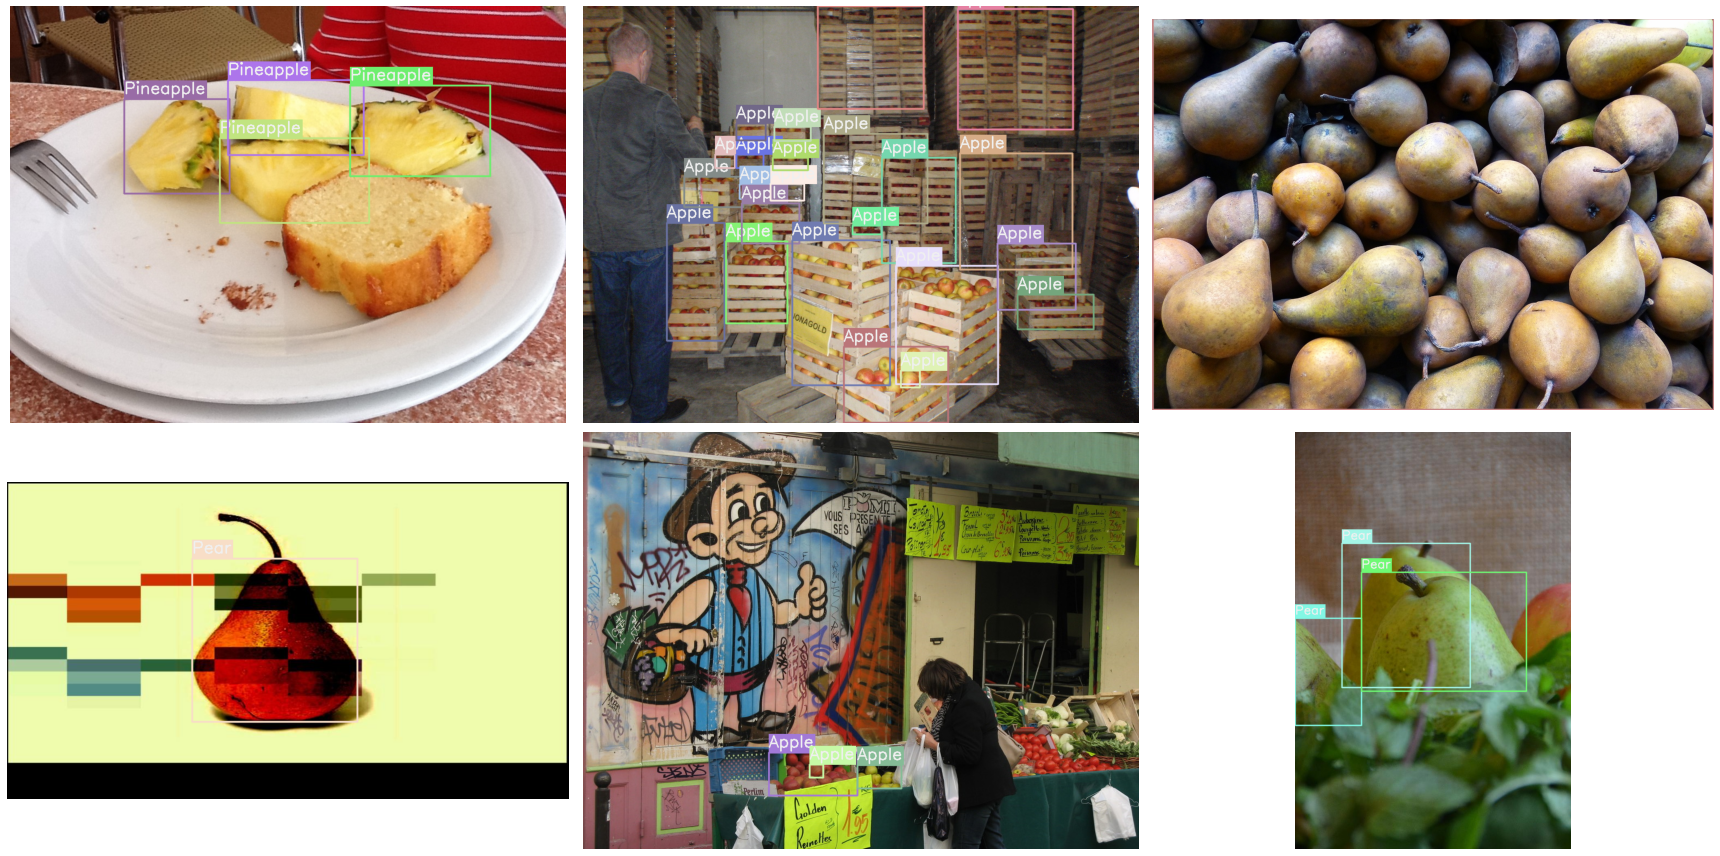

In [24]:
import random
sample_records = random.choices(train_records, k=6)
show_records(sample_records, ncols=3, class_map=class_map)

# Transforms

In [28]:
presize = 512
size = 384

# train_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(size=size), tfms.A.Normalize()])
train_tfms = tfms.A.Adapter([*tfms.A.aug_tfms(size=size, presize=presize), tfms.A.Normalize()])
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(size=size), tfms.A.Normalize()])

### Train and Validation Dataset Objects

In [29]:
train_ds = Dataset(train_records, train_tfms)
valid_ds = Dataset(valid_records, valid_tfms)

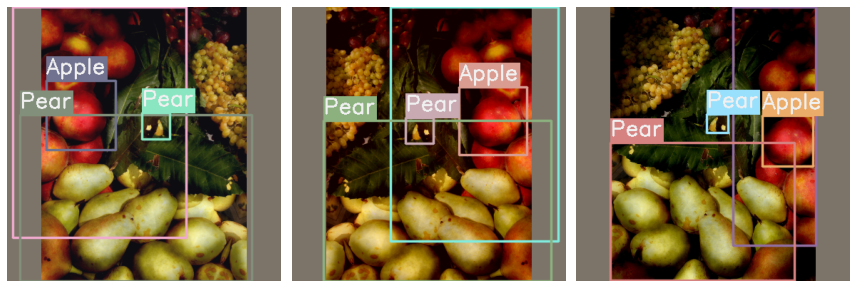

In [30]:
samples = [train_ds[10] for _ in range(3)]
show_samples(samples, class_map=class_map, denormalize_fn=denormalize_imagenet, ncols=3)

### DataLoaders

In [32]:
model_type = efficientdet # faster_rcnn # efficientdet

In [33]:
train_dl = model_type.train_dl(train_ds, batch_size=16, num_workers=4, shuffle=True)
valid_dl = model_type.valid_dl(valid_ds, batch_size=16, num_workers=4, shuffle=False)

## Model

In [35]:
model = model_type.model('tf_efficientdet_lite0', num_classes=len(class_map), img_size=size)
# model = model_type.model(num_classes=len(class_map))

Downloading: "https://github.com/rwightman/efficientdet-pytorch/releases/download/v0.1/tf_efficientdet_lite0-f5f303a9.pth" to /root/.cache/torch/hub/checkpoints/tf_efficientdet_lite0-f5f303a9.pth


## Training

In [36]:
metrics = [COCOMetric(metric_type=COCOMetricType.bbox)]

In [37]:
learn = model_type.fastai.learner(dls=[train_dl, valid_dl], model=model, metrics=metrics)

## Learning Rate Finder

SuggestedLRs(lr_min=0.012022644281387329, lr_steep=0.10000000149011612)

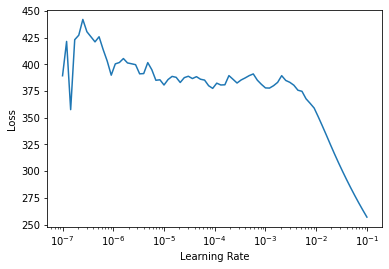

In [38]:
learn.freeze()
learn.lr_find()

### Fine tune: 2 Phases
- Phase 1: Train the head for 1 epochs while freezing the body
- Phase 2: Train both the body and the head during 10 epochs

In [ ]:
from fastai.callback.tracker import SaveModelCallback
learn.fine_tune(10, 0.012, freeze_epochs=1, cbs=SaveModelCallback(monitor='COCOMetric', fname='bccd-faster-rcnn'))

epoch,train_loss,valid_loss,COCOMetric,time
0,173.606140,64.345024,0.000001,06:30


Better model found at epoch 0 with COCOMetric value: 9.471470406589747e-07.


epoch,train_loss,valid_loss,COCOMetric,time
0,1.242903,29.497000,0.001352,07:59
1,1.135942,7.351895,0.002303,07:56
2,1.068503,2.149127,0.023767,07:57
3,1.009708,1.508787,0.057213,08:05


Better model found at epoch 0 with COCOMetric value: 0.0013519581569815483.
Better model found at epoch 1 with COCOMetric value: 0.002303376237768102.
Better model found at epoch 2 with COCOMetric value: 0.023766853413885587.
Better model found at epoch 3 with COCOMetric value: 0.057213496588178814.
